<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------

<ipython-input-13-c33421827f4e>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=customers, x='Region', palette='Set2')


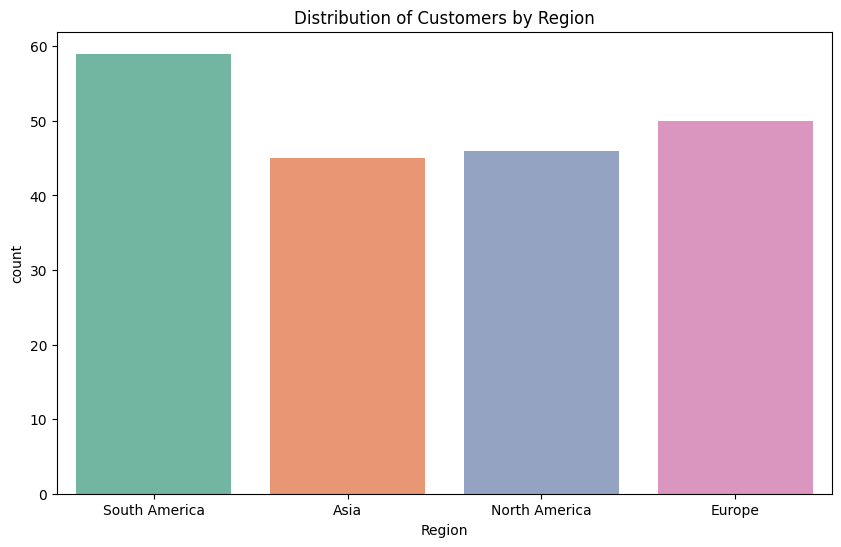

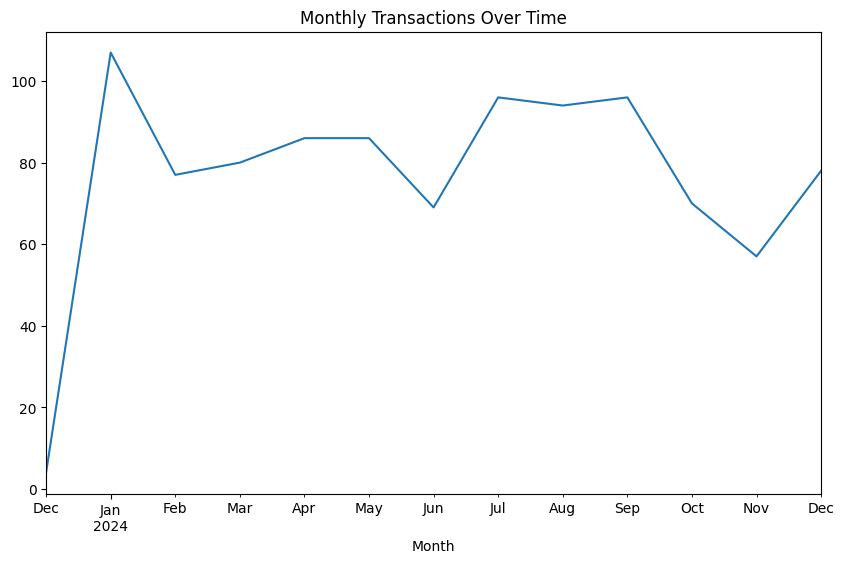

<ipython-input-13-c33421827f4e>:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=total_value_by_category, x='Category', y='TotalValue', palette='Set1')


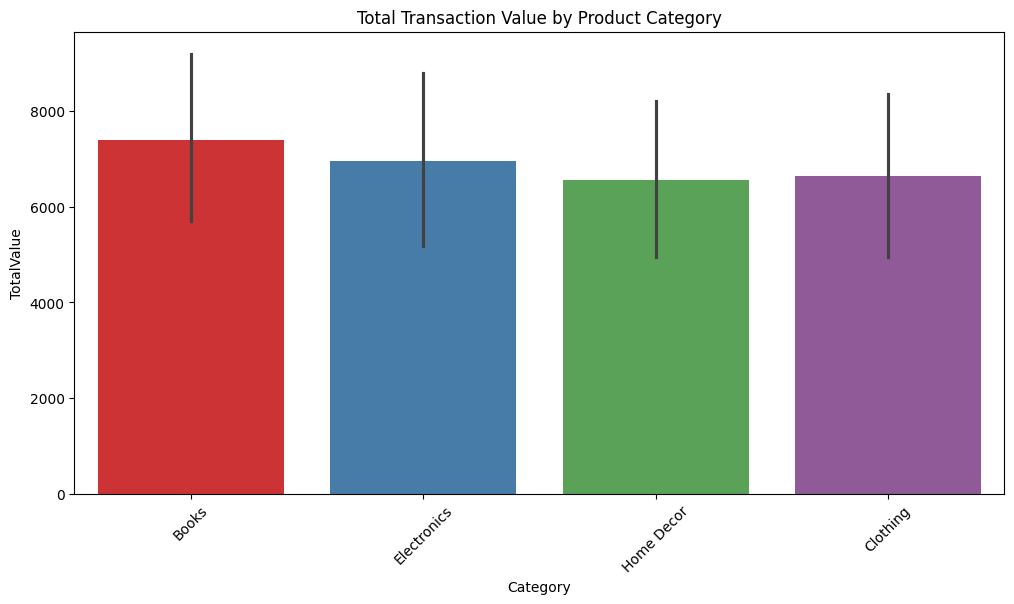

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
customers = pd.read_csv('/content/Customers.csv')
products = pd.read_csv('/content/Products.csv')
transactions = pd.read_csv('/content/Transactions.csv')

# Show basic info about the data
print(customers.info())
print(products.info())
print(transactions.info())

# Check for missing values
print(customers.isnull().sum())
print(products.isnull().sum())
print(transactions.isnull().sum())

# Summary statistics
print(customers.describe())
print(products.describe())
print(transactions.describe())

# Visualizations
plt.figure(figsize=(10, 6))
sns.countplot(data=customers, x='Region', palette='Set2')
plt.title("Distribution of Customers by Region")
plt.show()

# Temporal analysis: Transaction trends over time
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])
transactions['Month'] = transactions['TransactionDate'].dt.to_period('M')
monthly_transactions = transactions.groupby('Month').size()
monthly_transactions.plot(kind='line', figsize=(10, 6), title="Monthly Transactions Over Time")
plt.show()

# Total Value by Category
total_value_by_category = transactions.groupby('ProductID')['TotalValue'].sum().reset_index()
total_value_by_category = total_value_by_category.merge(products, on='ProductID')
plt.figure(figsize=(12, 6))
sns.barplot(data=total_value_by_category, x='Category', y='TotalValue', palette='Set1')
plt.title("Total Transaction Value by Product Category")
plt.xticks(rotation=45)
plt.show()

